# Random Forest

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


numerical = pd.read_csv('numerical.csv')
categorical = pd.read_csv('categorical.csv')
targets = pd.read_csv('target.csv')
data = pd.concat([numerical, categorical, targets], axis = 1)
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [2]:
# data.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)

In [3]:
data.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11.0,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10.0,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5

We still had lots of NA's even though the percentage was small.

In [4]:
data.isna().sum()

TCODE           0
AGE             0
INCOME          0
WEALTH1         0
HIT             0
               ..
LASTDATE_MM     0
FIRSTDATE_YR    0
FIRSTDATE_MM    2
TARGET_B        0
TARGET_D        0
Length: 339, dtype: int64

# To simplify, let's drop any row with an NA on any column

In [5]:
data.dropna(axis= 0,inplace=True)

In [6]:
data.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11.0,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10.0,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5

In [7]:
data.reset_index(drop=True, inplace=True)

In [8]:
data.shape

(95410, 339)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

y = data['TARGET_B']
X = data.drop(['TARGET_B'], axis = 1)

numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(np.object)

display(categoricalX.head())



for col in categoricalX.columns:
    print(col, categoricalX[col].nunique())

print()
# We're going to drop columns "OSOURCE" and "ZIP" because they too many levels.
# categoricalX.drop(columns = ['OSOURCE','ZIP'], axis = 1, inplace = True)
# we OneHotEncode the categoricals so we can use the same dataset to perform a regression later (in the lab).
# even though it is not needed for a DecisionTree or RandomForest model

encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)



,STATE,HOMEOWNR,GENDER,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A
0,IL,H,F,L,E,C,T
1,CA,H,M,L,G,A,S
2,NC,U,M,L,E,C,R
3,CA,U,F,L,E,C,R
4,FL,H,F,L,F,A,S


STATE 12
HOMEOWNR 2
GENDER 3
RFA_2R 1
RFA_2A 4
GEOCODE2 4
DOMAIN_A 5



In [10]:
data['TARGET_B'].value_counts()

0    90567
1     4843
Name: TARGET_B, dtype: int64

## Upscaling the data

In [11]:
### Normaliyation by columns 
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(numericalX)
numericalXT = transformer.transform(numericalX)
numericalXT = pd.DataFrame(numericalXT, columns=numericalX.columns)
numericalXT.head()


,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_D
0,-0.056848,-0.111517,0.509137,0.717397,-0.356879,-0.206980,0.745789,0.284662,-0.826557,0.718995,-0.501040,-0.508003,-0.628723,-0.394190,-0.412181,-0.419476,-1.235279,0.684681,0.970594,-0.217722,0.355153,0.340050,-0.387491,-0.223939,-0.411010,0.256909,-0.318007,-0.178014,-0.241862,-0.243157,-0.249710,-0.199514,-0.058468,0.517200,-0.233971,-0.102048,-0.449781,0.542820,0.738057,0.726518,0.562258,0.762333,0.887825,0.064522,-1.043799,0.570865,1.027126,-0.197243,-1.051628,-0.427141,0.681646,0.275533,0.076073,1.090506,-0.815427,-1.390310,0.439325,1.149880,0.486157,0.106699,0.084416,0.053345,-0.409677,-0.076575,0.433508,0.215620,0.239543,0.027293,0.223589,-0.816501,0.936112,-0.444534,0.254353,0.326941,1.077773,1.099074,-0.167906,-0.732822,-0.731078,-0.640497,0.882073,1.372545,-0.156495,-0.618891,-0.525704,-0.530468,-0.835832,0.750719,-0.739039,0.465721,-0.519699,-0.321109,0.179938,0.561295,0.692458,0.353348,0.147029,-0.102734,-0.353746,0.334754,-0.266461,-0.648919,-0.418023,-0.442072,0.035948,-0.054118,0.621332,-0.431795,-0.453944,-0.286397,-0.435256,-0.440468,-0.603251,-0.657922,-0.909172,-0.356850,-0.510819,0.711411,0.471801,0.694281,0.337389,-0.331518,-0.637545,-0.544386,-0.593679,0.364483,-0.565693,-0.618009,-0.533674,-0.843039,-1.069745,-1.297577,-0.145106,-1.232640,-0.075631,0.154747,-0.202945,-0.397586,-0.238223,-0.307574,-0.331607,-0.585640,0.765382,1.155208,0.626854,-0.098227,-0.785951,-0.661012,-0.486557,-0.191474,-0.874769,0.989490,0.990257,0.635794,-0.156501,-0.687719,-0.666123,-0.483571,-0.050957,0.089204,-0.338270,0.471271,-0.977290,-0.147855,0.202770,-0.904543,0.895783,-0.746168,-0.429079,-0.400316,-0.206931,-0.138681,-0.343706,-0.741217,0.202312,-0.203278,-0.278109,-0.809186,-1.164964,-0.618820,-0.864424,-0.627257,-0.672842,-0.438364,-0.387237,-0.651664,-0.128767,0.243124,0.939198,-1.401216,-0.717481,-0.622347,-1.344218,1.738255,0.107744,-1.133832,-0.421219,0.718871,-0.256271,0.028161,0.618459,2.160239,0.306458,0.086626,-0.028128,-0.292228,-0.827596,2.363642,-1.024580,-1.162447,0.849343,-0.634084,-0.184699,0.103897,-1.018354,1.099320,0.211828,-0.756182,-1.

## Concatenate and train_test_split

In [12]:
X = pd.concat([numericalXT, encoded_categorical], axis = 1)

# Note: we need to do train/test split before downsampling, and then only downsample the training set - Why?

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
X_train_b = pd.DataFrame(X_train_b)
X_test_b = pd.DataFrame(X_test_b)

y_train_regression = X_train_b['TARGET_D']
y_test_regression = X_test_b['TARGET_D']

# Now we can remove the column target d from the set of features
X_train_b = X_train_b.drop(['TARGET_D'], axis = 1)
X_test_b = X_test_b.drop(['TARGET_D'], axis = 1)

## PREDICTION OF TARGET_B = Number of donation

### Target_B = Will they donate?
### Target_D = How much?

### We want to avoid the false positive case (40% rate) because The model pretend they will donate and actually they won't. As a consequences,  we will never contact them (or send ads)  to  convince them: We have to minimize this false positive rate.

### 3 things to minimize the number of False Positive :

###   Giving positive samples a very large weight during training
###   Data augmentation of positive samples, so making the positive dataset 20 time bigger, so no downsampling
###   Use make_scorer on the false positive to minimize it


###  The second most important for business  is to have a PREDICTION OF TARGET_D = Donation value

## Make_scorer on minimizing FP

In [14]:
from sklearn.metrics import make_scorer
def false_positive_rate(y_true, y_pred_b):

    # false positive
    fp = ((y_pred_b == 1) & (y_train_b == 0)).sum()

    # true negative
    tn = ((y_pred_b == 0) & (y_train_b == 0)).sum()

    # false positive rate
    return fp / (fp + tn)

scoring_FPR = make_scorer(false_positive_rate, greater_is_better=False, needs_proba=True)

## Cross validation

##  RandomForestClassifier + cross_val_score

The mean R2 of the folds was 0.95
The False positive rate is 0.00


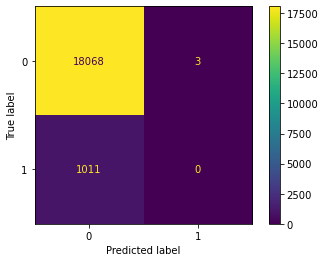

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier()
clf.fit(X_train_b, y_train_b)
y_pred_b = clf.predict(X_test_b)

cross_val_scores = cross_val_score(clf, X_train_b, y_train_b, cv=2)

print("The mean R2 of the folds was {:.2f}".format(np.mean(cross_val_scores)))


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_test = confusion_matrix(y_test_b,y_pred_b)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
print("The False positive rate is {:.2f}".format(cm_test[0][1]/(cm_test[0][0]+cm_test[0][1])))
disp.plot()


## RandomForestClassifier + cross_val_score with make_scorer

The False positive rate is 0.00


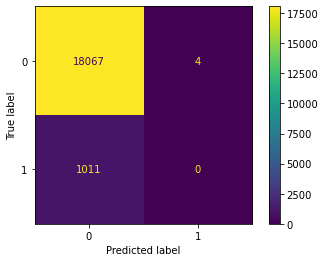

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

y_true = y_train_b
clf = RandomForestClassifier()
clf.fit(X_train_b, y_train_b)
y_pred_b = clf.predict(X_test_b)

cross_val_scores = cross_val_score(clf, X_train_b, y_train_b, cv=5, scoring=make_scorer(false_positive_rate, greater_is_better=False, needs_proba=True))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_test = confusion_matrix(y_test_b,y_pred_b)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
print("The False positive rate is {:.2f}".format(cm_test[0][1]/(cm_test[0][0]+cm_test[0][1])))

disp.plot()



## RandomForestClassifier 2 : No parameters set

The R2 for the Random Forest in the TRAIN set is 1.00
The R2 for the Random Forest in the TEST  set is 0.95


0    18071
1     1011
Name: TARGET_B, dtype: int64

The False positive rate is 0.00


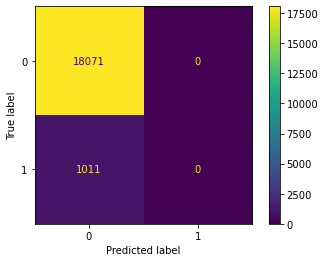

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier()
clf.fit(X_train_b, y_train_b)

print("The R2 for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train_b, y_train_b)))
print("The R2 for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test_b, y_test_b)))


y_pred_b = clf.predict(X_test_b)
display(y_test_b.value_counts())
display(cm = confusion_matrix(y_test_b, y_pred_b))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test_b,y_pred_b)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=clf.classes_)
print("The False positive rate is {:.2f}".format(cm_test[0][1]/(cm_test[0][0]+cm_test[0][1])))

disp.plot()


# PREDICTION OF TARGET_D = Donation value 

In [18]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:

print(X_train_d.shape)

(76328, 355)


In [20]:
X_train_d = pd.DataFrame(X_train_d)
X_test_d = pd.DataFrame(X_test_d)

# # y_train_regression = X_train_d['TARGET_B']
# # y_test_regression = X_test_d['TARGET_B']

# # Now we can remove the column target d from the set of features
# X_train_d = X_train_d.drop(['TARGET_B'], axis = 1)
# X_test_d = X_test_d.drop(['TARGET_B'], axis = 1)

## LinearRegression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

lm = LinearRegression()
lm.fit(X_train_d, y_train_d)

y_pred_train = lm.predict(X_train_d)
y_pred_test = lm.predict(X_test_d)

r2_train = r2_score(y_pred_train, y_train_d)
r2_test = r2_score(y_pred_test, y_test_d)

mse_train = mean_squared_error(y_pred_train, y_train_d)
mse_test = mean_squared_error(y_pred_test, y_test_d)


print("R2 score of trained dataset is", round(r2_train,3))
print("R2 score of test dataset is", round(r2_test,3))

print("Mean absolute percentage error of train dataset is", round(mse_train, 2))
print("Mean absolute percentage error of test dataset is", round(mse_test, 2))
# print(round(lm.intercept_, 2))
# print(np.round_(lm.coef_))

R2 score of trained dataset is 0.381
R2 score of test dataset is 0.38
Mean absolute percentage error of train dataset is 0.02
Mean absolute percentage error of test dataset is 0.02


## Cross validation

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()

cross_val_scores = cross_val_score(clf, X_train_d, y_train_d, cv=5)

print("The mean R2 of the folds was {:.2f}".format(np.mean(cross_val_scores)))
cross_val_scores

The mean R2 of the folds was 1.00


array([1., 1., 1., 1., 1.])

## DecisionTreeRegressor

In [23]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor()
regr.fit(X_train_d, y_train_d)
print("Train data R2 was: {:.2f}".format(regr.score(X_train_d, y_train_d)))
print("Test data R2 was: {:.2f}".format(regr.score(X_test_d, y_test_d)))

Train data R2 was: 1.00
Test data R2 was: 1.00


## RandomForestRegressor 2 : No parameters set

In [24]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()
clf.fit(X_train_d, y_train_d)

y_pred_train_d = clf.predict(X_train_d)
y_pred_test_d = clf.predict(X_test_d)

mse_train = mean_squared_error(y_pred_train_d, y_train_d)
mse_test = mean_squared_error(y_pred_test_d, y_test_d)

print("The R2 for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train_d, y_train_d)))
print("The R2 for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test_d, y_test_d)))

print("Mean absolute percentage error of train dataset is", round(mse_train, 5))
print("Mean absolute percentage error of test dataset is", round(mse_test, 5))

display(y_test_d.value_counts())


The R2 for the Random Forest in the TRAIN set is 1.00
The R2 for the Random Forest in the TEST  set is 1.00
Mean absolute percentage error of train dataset is 0.0
Mean absolute percentage error of test dataset is 0.0


0    18071
1     1011
Name: TARGET_B, dtype: int64

In [25]:
data['TARGET_D'].sum()

75668.7

In [26]:
data[data['TARGET_D']!=0]['TARGET_D'].mean()

15.624344414619037

In [27]:
data[data['TARGET_D']!=0]['TARGET_D'].describe()

count    4843.000000
mean       15.624344
std        12.445137
min         1.000000
25%        10.000000
50%        13.000000
75%        20.000000
max       200.000000
Name: TARGET_D, dtype: float64

# Downsampling : previous value (standard for Target_B)

In [28]:
# for downsampling we need to temporarily concat X_train and y_train
trainset = pd.concat([X_train_b, y_train_b], axis=1)

# Manual way to downsample category 0:
category_0 = trainset[trainset['TARGET_B']==0].sample(len(trainset[trainset['TARGET_B']==1]))
print(category_0.shape)

category_1 = trainset[trainset['TARGET_B']== 1 ]
trainset_new = pd.concat([category_0, category_1], axis = 0)
trainset_new = trainset_new.sample(frac =1) #randomize the rows
X_train_b = trainset_new.drop(['TARGET_B'], axis=1)
y_train_b = trainset_new['TARGET_B']
#data = data.reset_index(drop=True)
print(X_train_b.shape)

(3832, 355)
(7664, 354)


## RandomForestClassifier

The R2 for the Random Forest in the TRAIN set is 1.00
The R2 for the Random Forest in the TEST  set is 0.58


0    18071
1     1011
Name: TARGET_B, dtype: int64

The False positive rate is 0.41


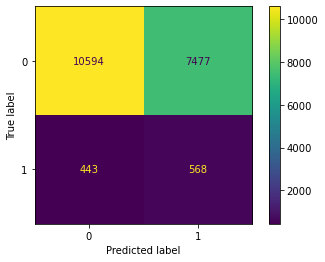

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier()
clf.fit(X_train_b, y_train_b)

print("The R2 for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train_b, y_train_b)))
print("The R2 for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test_b, y_test_b)))


y_pred_b = clf.predict(X_test_b)
display(y_test_b.value_counts())
display(cm = confusion_matrix(y_test_b, y_pred_b))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test_b,y_pred_b)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=clf.classes_)
print("The False positive rate is {:.2f}".format(cm_test[0][1]/(cm_test[0][0]+cm_test[0][1])))

disp.plot()


## RandomForestClassifier + cross_val_score with make_scorer

The False positive rate is 0.41


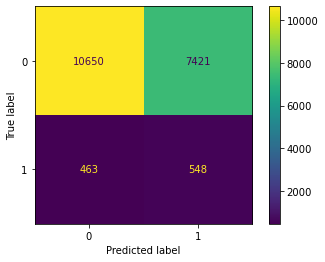

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

y_true = y_train_b
clf = RandomForestClassifier()
clf.fit(X_train_b, y_train_b)
y_pred_b = clf.predict(X_test_b)

cross_val_scores = cross_val_score(clf, X_train_b, y_train_b, cv=5, scoring=make_scorer(false_positive_rate, greater_is_better=False, needs_proba=True))


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_test = confusion_matrix(y_test_b,y_pred_b)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
print("The False positive rate is {:.2f}".format(cm_test[0][1]/(cm_test[0][0]+cm_test[0][1])))

disp.plot()


## Conclusion
### About the number (Target_b)
### The best way to avoid the false positive is to take into consideration all the population and to send "a kind reminder" to all for the contribution.
### About the amout (Target_d) : 
### This contribution in average is 15
### The predictive model Linear model has a r2 = 38% and r2 = 100% for the RandomforestRegressor